In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

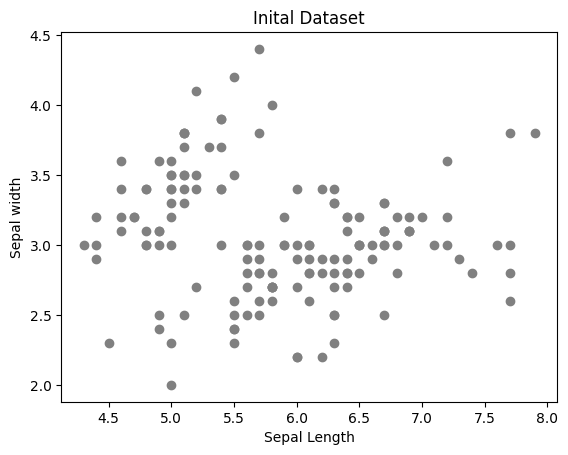

In [19]:
iris_dataset = load_iris()
data = iris_dataset.data
data = iris_dataset.data[:,:3]

#plot data

plt.scatter(data[:,0],data[:,1],c='gray')
plt.title('Inital Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.show()

In [28]:
class KMeans:
  def __init__(self,k=3,max_iters=100):
    self.k = k
    self.max_iters = max_iters
    self.centroids = None
    self.clusters = None
  def initalize_centroids(self,data):
    np.random.seed(42)
    self.centroids = data[np.random.choice(data.shape[0],self.k,replace=False)]
  def euclidean_distance(self,x1,x2):
    return np.sqrt(np.sum(np.power(x1-x2,2)))
  def assign_clusters(self,data):
    distances = np.array([[self.euclidean_distance(x,centroids) for centroids in self.centroids] for x in data])
    return np.argmin(distances,axis=1)
  def update_centroids(self,data):
    return np.array([data[self.clusters==i].mean(axis=0) for i in range(self.k)])
  def fit(self,data):
    self.initalize_centroids(data)
    for i in range(self.max_iters):
      self.clusters = self.assign_clusters(data)
      self.plot_clusters(data,i)
      new_centroids = self.update_centroids(data)
      if np.all(self.centroids==new_centroids):
        break
      self.centroids = new_centroids
    self.plot_final_clusters(data)
    return self.centroids
  def plot_clusters(self,data,iteration):
    plt.scatter(data[:,0],data[:,1] ,c=self.clusters, cmap='viridis',marker='o',alpha=0.6)
    plt.scatter(self.centroids[:,0],self.centroids[:,1],s=300,c='red',marker='x')
    plt.title(f'Iteration {iteration+1}')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal width')
    plt.show()
  def plot_final_clusters(self,data):
    plt.scatter(data[:,0],data[:,1],c=self.clusters,cmap='viridis',marker='o',alpha=0.6)
    plt.scatter(self.centroids[:,0],self.centroids[:,1],s=300,c='red',marker='x')
    plt.title('Final Clusters and centroids')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal width')
    plt.show()


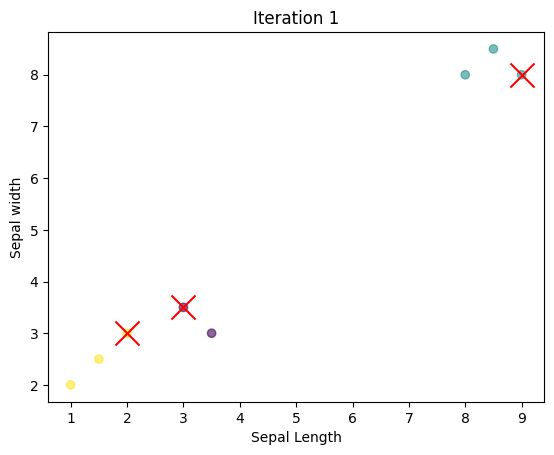

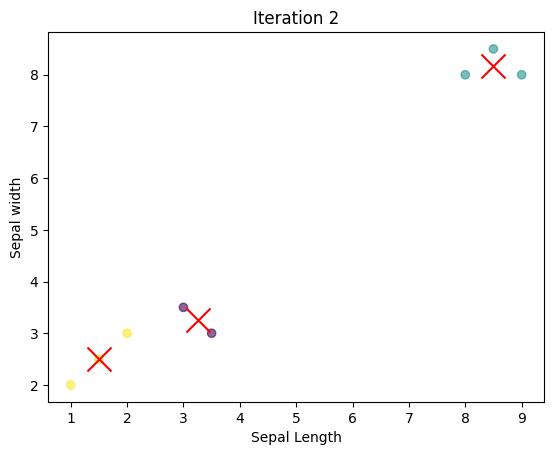

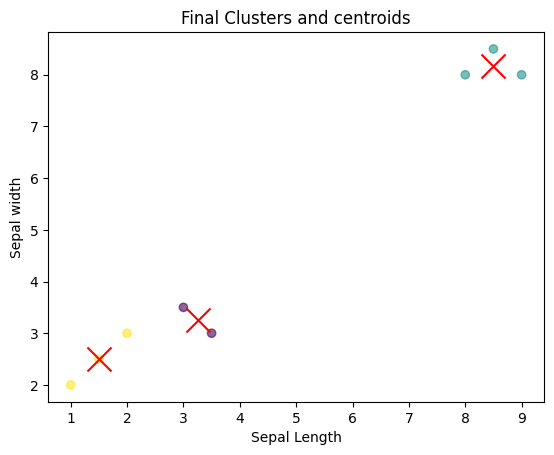

array([[3.25      , 3.25      , 2.25      ],
       [8.5       , 8.16666667, 8.        ],
       [1.5       , 2.5       , 1.33333333]])

In [29]:
kmeans = KMeans(3,10)
data = np.array([
    [2.0, 3.0, 1.5],
    [3.0, 3.5, 2.0],
    [3.5, 3.0, 2.5],
    [8.0, 8.0, 7.5],
    [8.5, 8.5, 8.0],
    [9.0, 8.0, 8.5],
    [1.0, 2.0, 1.0],
    [1.5, 2.5, 1.5]
])

kmeans.fit(data)